# Review classifier for the Google Play store using Naive Bayes

In [89]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from pickle import dump
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import numpy as np

The url data is loaded and saved in the 'raw' folder in csv format

In [13]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv'

df = pd.read_csv(url)
save_path = '../data/raw/playstore_reviews.csv'
os.makedirs(os.path.dirname(save_path), exist_ok=True)
df.to_csv(save_path, index=False)

In [43]:
df.head()

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0



Removal of column 'package_name', because it has no information relevant to the prediction

In [25]:
df = df.drop(columns = 'package_name')


Remove spaces and convert text to lowercase

In [36]:
df["review"] = df["review"].str.strip().str.lower()

Split of data into train and test

In [37]:
X = df['review']
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

vocabulary = vec_model.get_feature_names_out()

print('Vocabulary:', vocabulary)

Vocabulary: ['000' '04' '0x' ... 'žŕ' 'žŕľ' 'ˇŕ']


In [34]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Below we apply the 3 methods of the Naive Bayes algorithm:

<center><b><h1>Bernoulli Method</h1></b></center>

In [46]:
model_bernoulli = BernoulliNB()
model_bernoulli.fit(X_train, y_train)

BernoulliNB()

In [48]:
y_pred = model_bernoulli.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [49]:
accuracy_score(y_test, y_pred)

0.770949720670391

With a default configuration, 77% accuracy is obtained. Now, we will modify some hyperparameters for optimization.

In [ ]:
# Define the range of values ​​for alpha and binarize
param_grid = {
    'alpha': [0.0, 0.1, 0.5, 1.0],  
    'binarize': [0.0, 0.1, 0.5, 1.0]    
}

# Create a BernoulliNB classifier
model_bernoulli = BernoulliNB()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model_bernoulli, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params

In [67]:
# Alpha and binarize are adjusted with the values ​​obtained previously
model_bernoulli = BernoulliNB(alpha=0.1, binarize=0.0) 

# Train the model with the training data
model_bernoulli.fit(X_train, y_train)

# Predict labels for test data
y_pred = model_bernoulli.predict(X_test)

# Calculate model accuracy
accuracy_b = accuracy_score(y_test, y_pred)

print(f'accuracy: {accuracy_b*100:.2f}%')

accuracy: 83.24%



By adjusting the hyperparameters, an accuracy of 83% is obtained, so the prediction has improved by 6 percentage units.

<center><b><h1>Gaussian Method</h1></b></center>

In [56]:
model_gauss = GaussianNB()
model_gauss.fit(X_train, y_train)

GaussianNB()

In [66]:
y_pred = model_gauss.predict(X_test)
accuracy_g = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy_g*100:.2f}%')

accuracy: 80.45%


In this case, a higher accuracy is obtained than in the default Bernoulli model. This method has no additional hyperparameters because it assumes that the features follow a Gaussian (normal) distribution.

<center><b><h1>Multinomial Method</h1></b></center>

In [61]:
model_multi = MultinomialNB()
model_multi.fit(X_train, y_train)

MultinomialNB()

In [68]:
y_pred = model_gauss.predict(X_test)
accuracy_score(y_test, y_pred)


0.8044692737430168

Basically the same accuracy is obtained as in the Gauss model. Now, we will improve the hyperparameters:

In [69]:
param_grid = {
    'alpha': [0.0, 0.1, 0.5, 1.0],  
    'fit_prior': [True, False]      
}

model_multi = MultinomialNB()

grid_search = GridSearchCV(estimator=model_multi, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

c:\Users\crroj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\crroj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
c:\Users\crroj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\crroj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
c:\Users\crroj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\crroj\AppData\Local\Programs\

{'alpha': 0.5, 'fit_prior': False}

In [70]:
model_multi = MultinomialNB(alpha=0.1, fit_prior=False)  

model_multi.fit(X_train, y_train)

y_pred = model_multi.predict(X_test)

accuracy_m = accuracy_score(y_test, y_pred)

print(f'accuracy: {accuracy_m*100:.2f}%')

accuracy: 83.24%


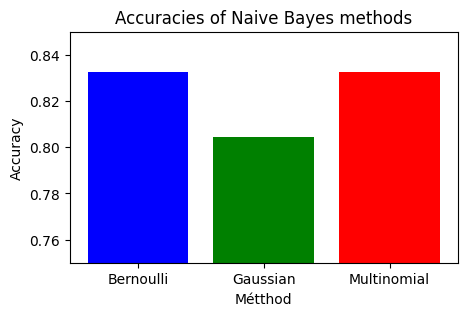

In [76]:
accuracies = [accuracy_b, accuracy_g, accuracy_m]
methods = ['Bernoulli', 'Gaussian', 'Multinomial']

# Create the bar chart
plt.figure(figsize=(5, 3))
plt.bar(methods, accuracies, color=['blue', 'green', 'red'])

plt.ylim(0.75, 0.85)

plt.title('Accuracies of Naive Bayes methods')
plt.xlabel('Métthod')
plt.ylabel('Accuracy')
plt.show()

CONCLUSION: 

Better results are obtained using the Bernoulli and Multinomial methods. However, since this is a data set with binary results, the most appropriate method would be the Bernoulli method.

In [77]:
dump(model_bernoulli, open("../models/nb_bernoulli-alpha01-bin0.sav", "wb"))

<center><b><h1>Random Forest</h1></b></center>

In [79]:
model_rf = RandomForestClassifier(n_estimators = 60, random_state = 42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

In [91]:
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')

Accuracy: 0.80


We obtain 80% accuracy in a random forest with 60 trees and a random state of 42. Next we look for the best parameters to optimize the model.

In [92]:
num_trees = [50, 100, 150, 200, 250]

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': num_trees,
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.810381168127647


Below is a comparison of the accuracy of the methods used in Naive Bayes with the optimized Random Forest:

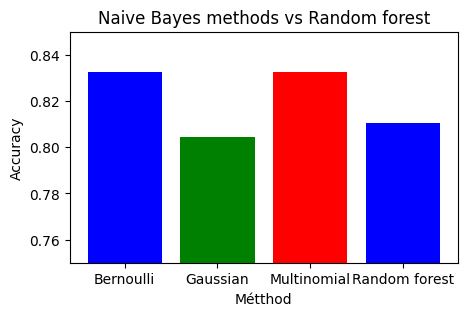

In [95]:
accuracies = [accuracy_b, accuracy_g, accuracy_m, best_score]
methods = ['Bernoulli', 'Gaussian', 'Multinomial', 'Random forest']

# Create the bar chart
plt.figure(figsize=(5, 3))
plt.bar(methods, accuracies, color=['blue', 'green', 'red'])

plt.ylim(0.75, 0.85)

plt.title('Naive Bayes methods vs Random forest')
plt.xlabel('Métthod')
plt.ylabel('Accuracy')
plt.show()


In general, the Bernoulli and Multinomial methods are the most appropriate for this kind of projects, since with these higher accuracy values ​​are obtained (83.24%).